In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Files to load: 

city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame:

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame:

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
## City Data Analysis

In [6]:
# Get the columns and the rows that are not null:

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null:

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#Data types of each column:

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#Get unique values of the type of city:

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#Get number of data points from Urban cities:

sum(city_data_df["type"]=="Urban")

66

In [11]:
#Get number of data points from Suburban cities:

sum(city_data_df["type"]=="Suburban")

36

In [12]:
#Get number of data points from Rural cities:

sum(city_data_df["type"]=="Rural")

18

In [13]:
## Ride Data Analysis

In [14]:
# Get the columns and the rows that are not null:

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Get the columns and the rows that are not null:

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
#Data types of each column:

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
## Merge dfs:

In [18]:
# Merge ride and city data:
    #new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

#Combine data into single dataset:

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create the Urban city df:

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban city df:

suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
suburban_cities_df.head(5)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
# Create the rural city df:

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head(5)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
## Rides per city:

In [23]:
# Get the number of rides for urban cities:

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [24]:
# Get the number of rides for suburban cities:

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [25]:
# Get the number of rides for rural cities:

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [26]:
## Avg. Fare for each city:

In [27]:
# Get theavg. fare each urban city:

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# Get theavg. fare each suburban city:

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
# Get theavg. fare each rural city:

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [30]:
## Avg number of drivers for each city:

In [31]:
# Average number of drivers for each urban city:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [32]:
# Average number of drivers for each suburban city:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [33]:
# Average number of drivers for each rural city:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [34]:
## Create the Urban Cities Bubble Chart:

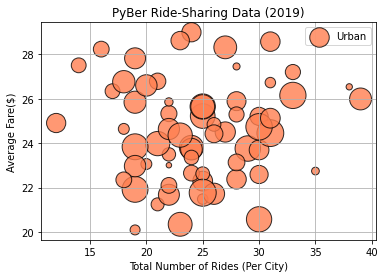

In [35]:
# Build the scatter plots for urban cities:

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10 * urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

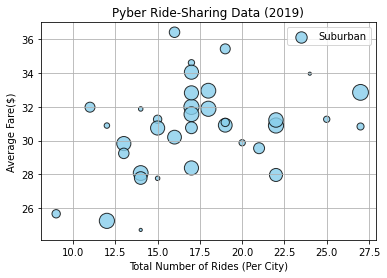

In [36]:
# Build the scatter plots for suburban cities:

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10 * suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

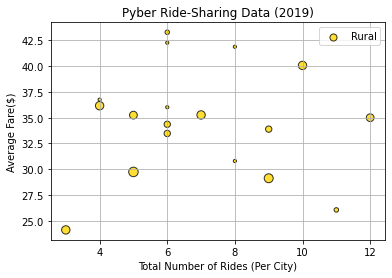

In [37]:
# Build the scatter plots for rural cities:

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10 * rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

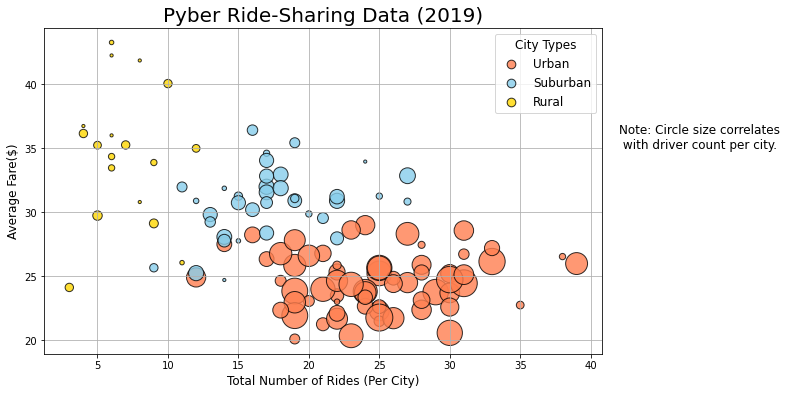

In [38]:
# Combine all scatter plots into one:

plt.subplots(figsize=(10,6))


#Urban:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10 * urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

#Suburban:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10 * suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

#Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10 * rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")


plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare($)', fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.legend()


# Update legend:

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Add note:
plt.text(42,35, "Note: Circle size correlates\n with driver count per city.", fontsize="12")

plt.show()

In [39]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [40]:
## Summary Statistics:

In [41]:
#Get Urban Summary statistics using .describe()

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [42]:
#Get Suburban Summary statistics using .describe()

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [43]:
#Get Rural Summary statistics using .describe()

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [44]:
# Pandas mean(), median(), and mode() Methods

In [45]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [46]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [47]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [48]:
# Calculate the mode of the ride count for each city type.
suburban_ride_count.mode()

0    17
dtype: int64

In [49]:
# Calculate the mode of the ride count for each city type.
rural_ride_count.mode()

0    6
dtype: int64

In [50]:
## NumPy mean() and median() Functions and SciPy mode() Function

In [51]:
# Import NumPy and the stats module from SciPy:

import numpy as np
import scipy.stats as sts

In [52]:
# Calculate the measures of central tendency for the ride count for the urban cities:

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [53]:
# Calculate the measures of central tendency for the ride count for the suburban cities:

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [54]:
# Calculate the measures of central tendency for the ride count for the rural cities:

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [55]:
## Summary Statistics for the Fare by City Type

In [56]:
# Get the fares for the urban cities:

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [57]:
# Calculate the measures of central tendency for the average fare for the urban cities:

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [60]:
# Get the fares for the suburban cities:

suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [61]:
# Calculate the measures of central tendency for the average fare for the suburban cities:

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [62]:
# Get the fares for the rural cities:

rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [63]:
# Calculate the measures of central tendency for the average fare for the rural cities:

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [ ]:
## Summary Statistics for the Number of Drivers by City Type:

In [64]:
#Driver count data from urban cities:

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [72]:
# Calculate the measures of central tendency for the drive count for the urban cities:

mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median driver for urban cities is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_driver_count}.")

The mean driver count for urban cities is 36.68.
The median driver for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [67]:
#Driver count data from suburban cities:

suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [73]:
# Calculate the measures of central tendency for the drive count for the suburban cities:

mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median driver for suburban cities is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_driver_count}.")

The mean driver count for suburban cities is 13.71.
The median driver for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [69]:
#Driver count data from rural cities:

rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [74]:
# Calculate the measures of central tendency for the drive count for the rural cities:

mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median driver for rural cities is {median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_driver_count}.")

The mean driver count for rural cities is 4.30.
The median driver for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [ ]:
## Create Box-and-Whisker Plots:

In [ ]:
###Box-and-Whisker Plots for Ride Count Data:

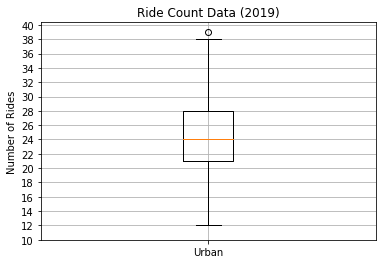

In [75]:
# Create a box-and-whisker plot for the urban cities ride count:

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Title, y-axis label, and grid:

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel( 'Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

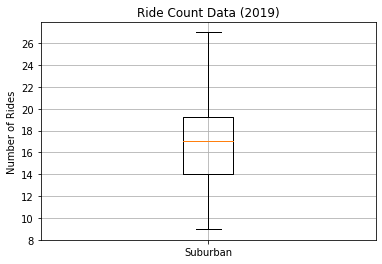

In [80]:
# Create a box-and-whisker plot for the suburban cities ride count:

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#Title, y-axis label, and grid:

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel( 'Number of Rides')
ax.set_yticks(np.arange(8,28, step=2.0))
ax.grid()
plt.show()

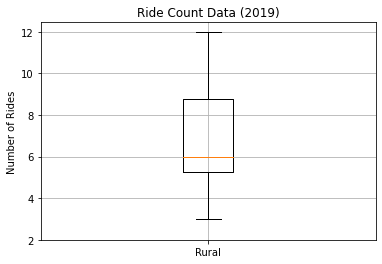

In [82]:
# Create a box-and-whisker plot for the rural cities ride count:

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

#Title, y-axis label, and grid:

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel( 'Number of Rides')
ax.set_yticks(np.arange(2,13, step=2.0))
ax.grid()
plt.show()

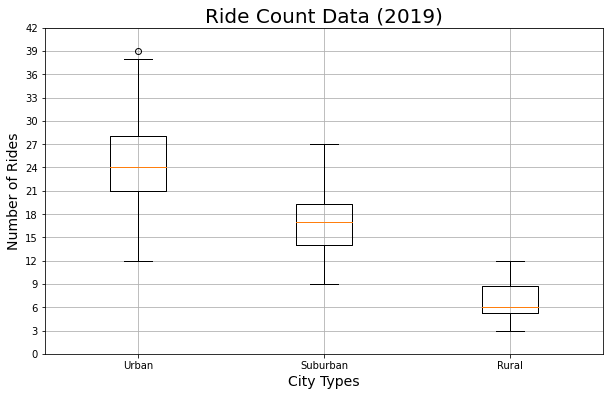

In [83]:
# Add all ride count box-and-whisker plots to the same graph:

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [84]:
# Finding the urban outlier city:

urban_city_outlier = urban_ride_count[urban_ride_count==39]. index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [85]:
## Box-and-Whisker Plots for Ride Fare Data:

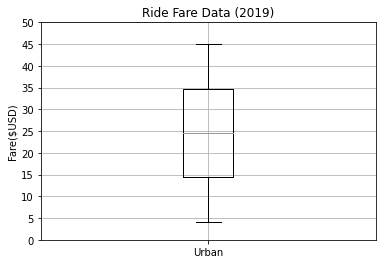

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [86]:
# Create a box-and-whisker plot for the urban fare data:

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

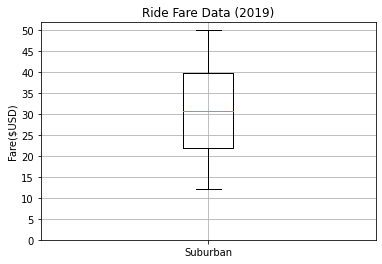

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [87]:
# Create a box-and-whisker plot for the suburban fare data:

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

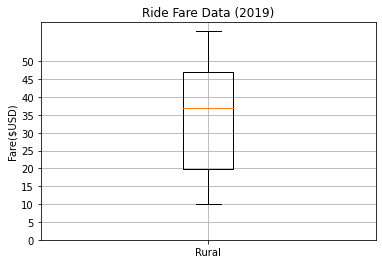

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [88]:
# Create a box-and-whisker plot for the rural fare data:

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

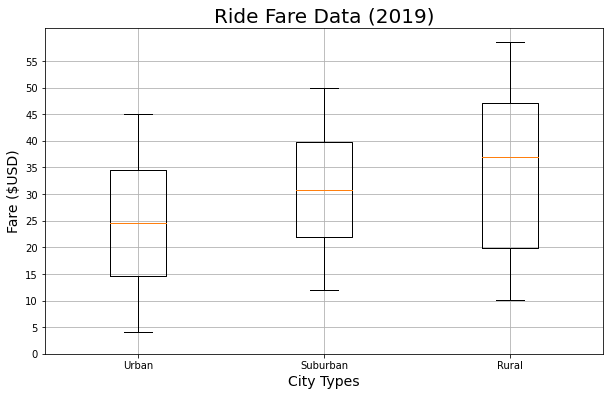

In [91]:
# Add all ride fare data box-and-whisker plots to the same graph:

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [ ]:
## Box-and-Whisker Plots for Driver Count Data:

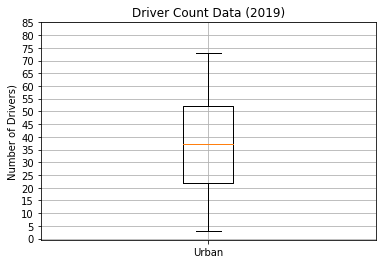

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [92]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

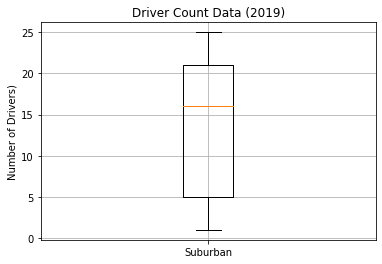

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [94]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

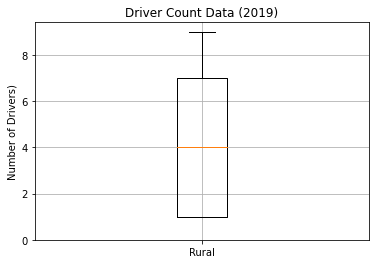

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [98]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

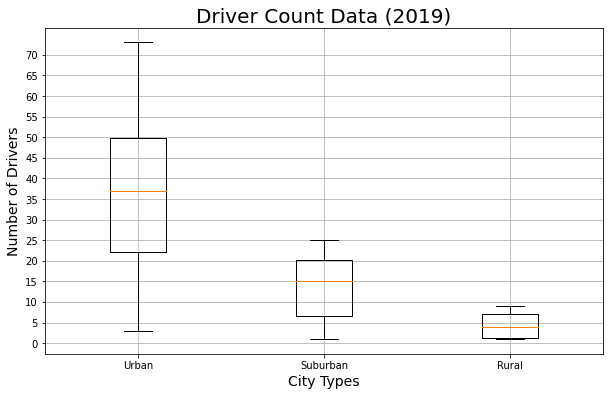

In [100]:
# Add all driver count data box-and-whisker plots to the same graph:

x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [ ]:
##Percentage of Fares for Each City Type:

In [101]:
# Get the sum of the fares for each city type:

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [102]:
# Get the sum of all the fares:

total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [103]:
# Calculate the percentage of fare for each city type:

type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [104]:
# Calculate the percentage of fare for each city type:

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [ ]:
### Pie Chart for the Percentage of Fares by City Type:

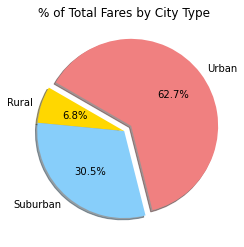

In [108]:
# Build the percentage of fares by city type pie chart:

plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

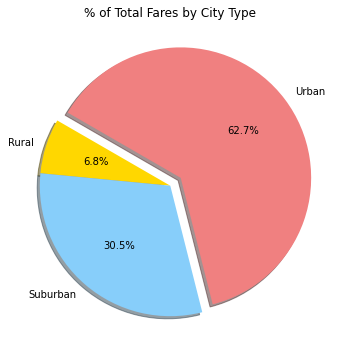

In [109]:
# Import mpl to change the plot configurations using rcParams:

import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14


# Save Figure
plt.savefig("analysis/Fig5.png")


# Show Figure
plt.show()

In [ ]:
### Build the percentage of total rides by city type pie chart:


In [111]:
# Get the sum of the total rides for each city type:

sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [112]:
# Get the sum of all rides:

total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [114]:
# Calculate the percentage of rides for each city type:

rides_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
rides_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

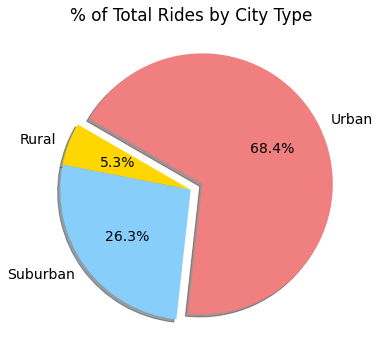

In [115]:
# Build the percentage of rides by city type pie chart:

plt.subplots(figsize=(10, 6))
plt.pie(rides_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")


# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14


# Save Figure
plt.savefig("analysis/Fig6.png")


# Show Figure
plt.show()

In [ ]:
### Build the percentage of total drivers by city type pie chart:

In [117]:
# Get the sum of the total drivers for each city type:

sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [118]:
# Get the sum of all drivers:

total_drivers = pyber_data_df["driver_count"].sum()
total_drivers

68709

In [119]:
# Calculate the percentage of drivers for each city type:

drivers_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
drivers_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

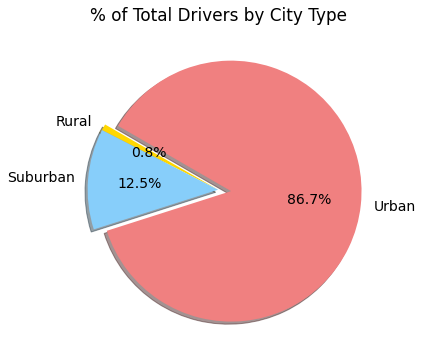

In [120]:
# Build the percentage of drivers by city type pie chart:

plt.subplots(figsize=(10, 6))
plt.pie(drivers_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")


# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14


# Save Figure
plt.savefig("analysis/Fig7.png")


# Show Figure
plt.show()